# "Изменение разрешения данных"

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 

# Понижение разрешения (downsampling)

In [3]:
df = pd.read_csv('data\gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df.head()

,ts,open,high,low,close,vol
0,2018-01-02 02:01:00,1305.3,1305.9,1304.6,1304.7,407
1,2018-01-02 02:02:00,1304.7,1305.1,1304.7,1305.0,91
2,2018-01-02 02:03:00,1305.0,1305.4,1305.0,1305.4,42
3,2018-01-02 02:04:00,1305.4,1305.5,1305.1,1305.2,89
4,2018-01-02 02:05:00,1305.2,1305.2,1305.1,1305.1,23


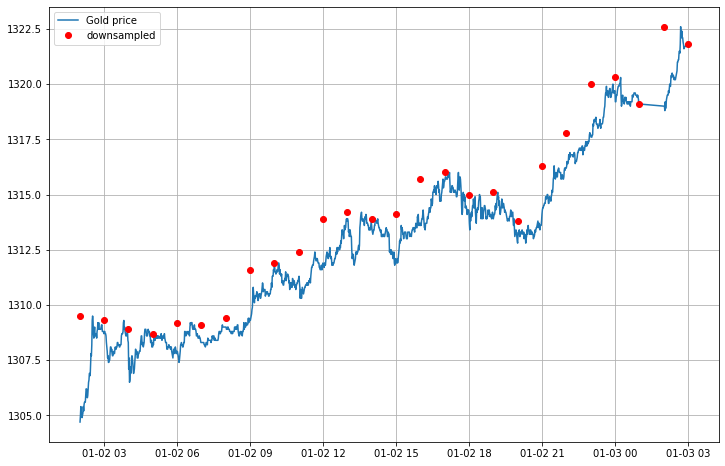

,ts,open,close,vol,high,low
0,2018-01-02 02:00:00,1305.3,1309.5,5284,1309.7,1304.6
1,2018-01-02 03:00:00,1308.8,1309.3,4906,1309.3,1307.3
2,2018-01-02 04:00:00,1308.4,1308.9,7923,1309.0,1306.2
3,2018-01-02 05:00:00,1308.0,1308.7,4039,1308.7,1307.4
4,2018-01-02 06:00:00,1307.8,1309.2,4529,1309.3,1307.3


In [5]:
df = df.iloc[:1440]

## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return min(value)

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'first', ## для цены открытия берём первое значение 
    'close':  'max',  ## для цены закрытия - cреднее
    'vol'  :  'sum',   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  myFunc   ## можно определить свою функцию аггрегации для наименьшого значения
}

## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('1H').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(downsampled.ts, downsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()

downsampled.head()

In [7]:
print(f'len(df) = {len(df)}')
print(f'len(downsampled) = {len(downsampled)}')

len(df) = 1440
len(downsampled) = 26


# Upsampling

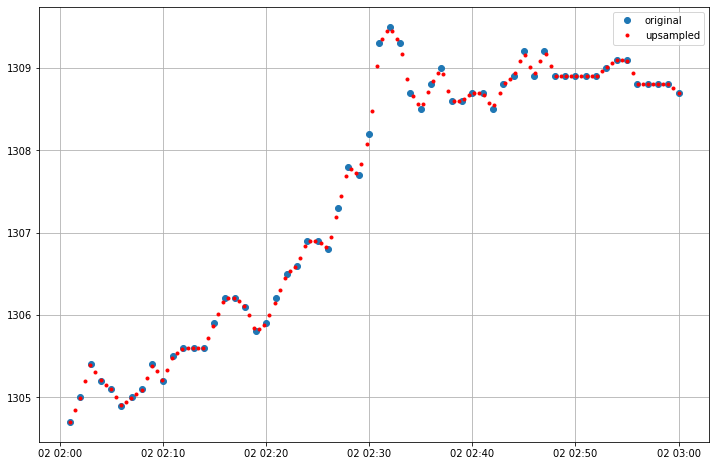

In [9]:
df = pd.read_csv('data\gold_clean.csv')

df['unixtime'] = df.ts
## преобразуем юниксовое время в таймстемп
df['ts'] = pd.to_datetime(df.ts)
## возьмём только первый час данных (60 минут)
df = df.iloc[:60]

## cделаем интерполяционную сетку, 120 значений (каждые 30 секунд)
## np.interp не умеет работать с таймстемпами, поэтому будем использовать
## юниксовое время, являющееся просто int
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 120)
## интерполируем
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
## исходные данные
ax.plot(df.ts, df.close, marker='o', lw=0)
## красными кружками помечаем моменты, в которые мы теперь имеем данные
ax.plot(ts, upsampled, c='r', marker='o', lw=0, markersize=3)
ax.legend(['original', 'upsampled'])
ax.grid()
plt.show()

# Понижение разрешения (Downsampling)

,timestamp,close
0,2018-01-02 02:01:00,1304.7
1,2018-01-02 02:02:00,1305.0
2,2018-01-02 02:03:00,1305.4
3,2018-01-02 02:04:00,1305.2
4,2018-01-02 02:05:00,1305.1


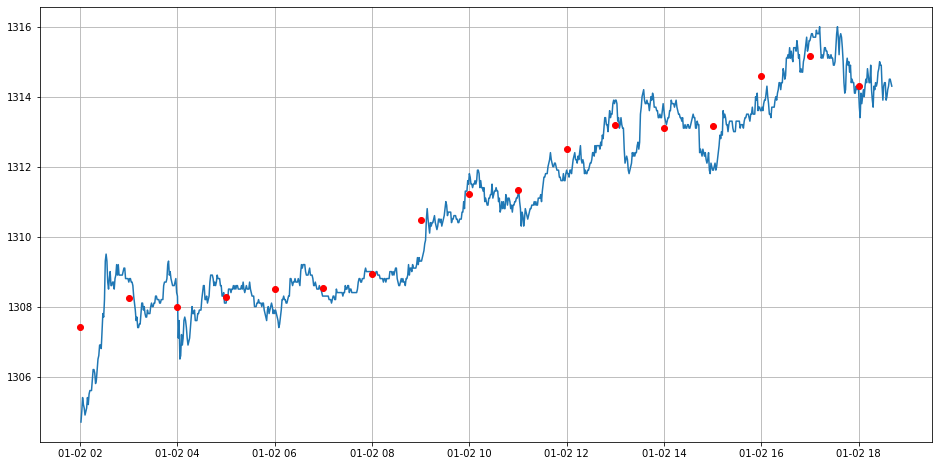

In [11]:
df = pd.read_csv('data\gold_clean.csv')
df = df.iloc[:1000]

df['timestamp'] = pd.to_datetime(df.ts) 

df = df[['timestamp', 'close']]
conversion = {'close' : 'mean'}

df = df.set_index('timestamp')
df_resampled = df.resample('1H').apply(conversion)
df = df.reset_index()
df_resampled = df_resampled.reset_index()

f, ax = plt.subplots(figsize=(16, 8))
ax.plot(df.timestamp, df.close)
ax.plot(df_resampled.timestamp, df_resampled.close, c='r', lw=0, marker='o')
ax.grid()

df.head()

In [12]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime

In [33]:
filePath = 'data\EURUSD_1.csv'
data = pd.read_csv(filePath)
data['ts'] = pd.to_datetime(data.ts)
print(f'data.shape = {data.shape}')

data.head()

data.shape = (121674, 6)


,open,high,low,close,vol,ts
0,1.05135,1.05192,1.05134,1.05187,65,2017-01-02 09:00:00
1,1.05185,1.05198,1.05153,1.05168,58,2017-01-02 09:01:00
2,1.05175,1.05201,1.05149,1.05154,33,2017-01-02 09:02:00
3,1.05177,1.05202,1.05177,1.05200,20,2017-01-02 09:03:00
4,1.05202,1.05202,1.05198,1.05202,7,2017-01-02 09:04:00


In [34]:
df = data.copy()

In [ ]:
fig = go.Figure(data  = [go.Candlestick(
            x=df['ts'],
            open  = df['open'],
            high  = df['high'],
            low   = df['low'],
            close = df['close']
        )])

fig.show()

Задания 8.10.1 - 8.10.5

Понизьте разрешение ряда с 1 минуты до 8 часов. Результат округлите до пятого знака после запятой.

In [35]:
## cвоя функция аггреагции: возвращаем наименьшее значение
def myFunc(value):
    return (np.median(value) + np.mean(value)) / 2

## определяем, как аггрегировать данные в колонках
conversion = {
    'open' :  'median', ## для цены открытия берём первое значение 
    'close':  'mean',  ## для цены закрытия - cреднее
    'vol'  :  myFunc,   ## суммируем объёмы сделок в этот час
    'high' :  'max',   ## берём максимум пикового значения
    'low'  :  'min'   ## можно определить свою функцию аггрегации для наименьшого значения
}

d:\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

d:\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide



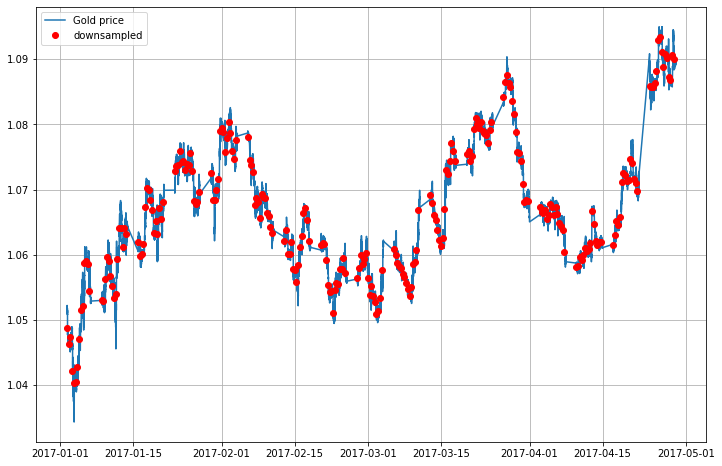

,ts,open,close,vol,high,low
0,2017-01-02 08:00:00,1.048130,1.048734,219.877108,1.05233,1.04617
1,2017-01-02 16:00:00,1.046490,1.046375,144.962264,1.04773,1.04498
2,2017-01-03 00:00:00,1.047480,1.047341,240.074113,1.04900,1.04531
3,2017-01-03 08:00:00,1.041110,1.042183,428.573958,1.04889,1.03748
4,2017-01-03 16:00:00,1.040885,1.040398,377.388542,1.04332,1.03402


In [36]:
## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
downsampled = df.resample('8H').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
downsampled = downsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(downsampled.ts, downsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()

downsampled.head()

In [40]:
downsampled.loc[5]

ts       2017-01-04 00:00:00
open                 1.04043
close               1.040474
vol               285.967708
high                 1.04236
low                  1.03898
Name: 5, dtype: object

8.10.6 - 8.10.8

Отфильтруйте ряд, оставив в нём лишь цены до 2017-01-03 00:00:00 включительно.

Используя те же аггрегирующие функции, при помощи функции resample повысьте разрешение отфильтрованного ряда до 10 секунд.

In [43]:
df = data[data['ts'] <= '2017-01-03']
df

,open,high,low,close,vol,ts
0,1.05135,1.05192,1.05134,1.05187,65,2017-01-02 09:00:00
1,1.05185,1.05198,1.05153,1.05168,58,2017-01-02 09:01:00
2,1.05175,1.05201,1.05149,1.05154,33,2017-01-02 09:02:00
3,1.05177,1.05202,1.05177,1.05200,20,2017-01-02 09:03:00
4,1.05202,1.05202,1.05198,1.05202,7,2017-01-02 09:04:00
...,...,...,...,...,...,...
888,1.04530,1.04531,1.04526,1.04528,76,2017-01-02 23:56:00
889,1.04531,1.04531,1.04525,1.04528,227,2017-01-02 23:57:00
890,1.04530,1.04531,1.04526,1.04528,287,2017-01-02 23:58:00
891,1.04530,1.04541,1.04526,1.04540,109,2017-01-02 23:59:00


d:\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning:

Mean of empty slice.

d:\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning:

invalid value encountered in scalar divide



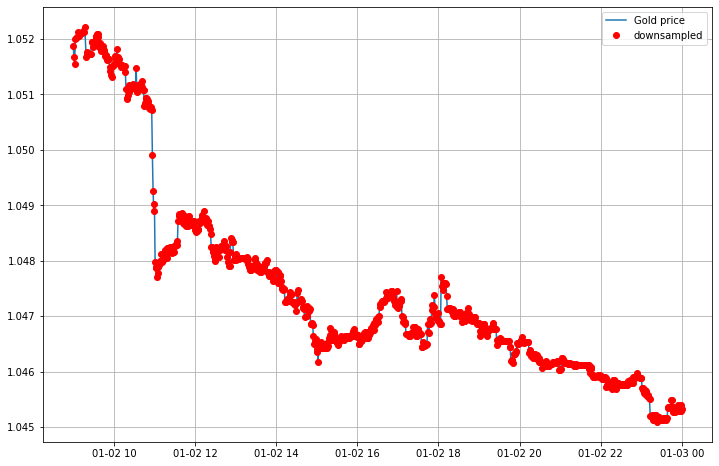

,ts,open,close,vol,high,low
0,2017-01-02 09:00:00,1.05135,1.05187,65.0,1.05192,1.05134
1,2017-01-02 09:00:10,NaN,NaN,NaN,NaN,NaN
2,2017-01-02 09:00:20,NaN,NaN,NaN,NaN,NaN
3,2017-01-02 09:00:30,NaN,NaN,NaN,NaN,NaN
4,2017-01-02 09:00:40,NaN,NaN,NaN,NaN,NaN


In [44]:
## downsampling будем проводить по переменной времени - ts
df = df.set_index('ts')
## уменьшаем частоту данных до 1 часа, аггрегируем данные, как описано выше
upsampled = df.resample('10S').apply(conversion)
## возвращаем время ts из индекса в отдельную колонку
df = df.reset_index()
upsampled = upsampled.reset_index()

## визуализируем
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.ts, df.close)
ax.plot(upsampled.ts, upsampled.close, c='r', marker='o', lw=0)
ax.legend(['Gold price', 'downsampled'])
ax.grid()
plt.show()

upsampled.head()

In [45]:
upsampled['open'].isna().sum()

4508

In [56]:
upsampled['open_linear'] = upsampled.open.interpolate(method='linear')
upsampled['close_near'] = upsampled.close.interpolate(method='nearest')
upsampled[upsampled['ts'] == '2017-01-02 09:00:40']

,ts,open,close,vol,high,low,open_linear,close_near
4,2017-01-02 09:00:40,NaN,NaN,NaN,NaN,NaN,1.051683,1.05168


In [58]:
df = data.copy()
df = df[(df.ts >= '2017-01-05 12:00:00') & (df.ts <= '2017-01-05 13:00:00')]
df['unixtime'] = df.ts.astype(np.int64)

fig = go.Figure(data  = [go.Candlestick(
            x=df['ts'],
            open  = df['open'],
            high  = df['high'],
            low   = df['low'],
            close = df['close']
        )])

fig.show()

df.head()

,open,high,low,close,vol,ts,unixtime
4491,1.05044,1.05052,1.05032,1.05048,530,2017-01-05 12:00:00,1483617600000000000
4492,1.05048,1.05053,1.05031,1.05046,447,2017-01-05 12:01:00,1483617660000000000
4493,1.05046,1.05080,1.05046,1.05075,516,2017-01-05 12:02:00,1483617720000000000
4494,1.05075,1.05093,1.05063,1.05087,477,2017-01-05 12:03:00,1483617780000000000
4495,1.05087,1.05118,1.05087,1.05101,456,2017-01-05 12:04:00,1483617840000000000


Задание 8.10.9

При помощи функции np.linspace создайте сетку, состоящую из 135 точек во времени (используя колонку unixtime). После чего, используя функцию np.interp, проинтерполируйте значения колонки close, на созданной сетке.

Укажите среднее значение интерполированного ряда, округлив его до шестого знака после запятой.

In [66]:
## cделаем интерполяционную сетку, 135 значений
ti = np.linspace(df.unixtime.min(), df.unixtime.max(), 135)
## интерполируем
upsampled = np.interp(ti, df.unixtime, df.close)
## переведём интерполяционную сетку в таймстемп
ts = pd.to_datetime(ti)

In [69]:
df.describe()

,open,high,low,close,vol,ts,unixtime
count,61.000000,61.000000,61.000000,61.000000,61.000000,61,6.100000e+01
mean,1.050314,1.050428,1.050182,1.050290,439.065574,2017-01-05 12:30:00,1.483619e+18
min,1.048830,1.048950,1.048730,1.048840,290.000000,2017-01-05 12:00:00,1.483618e+18
25%,1.049630,1.049790,1.049470,1.049510,380.000000,2017-01-05 12:15:00,1.483618e+18
50%,1.050560,1.050680,1.050510,1.050560,444.000000,2017-01-05 12:30:00,1.483619e+18
75%,1.050870,1.050930,1.050770,1.050870,478.000000,2017-01-05 12:45:00,1.483620e+18
max,1.051240,1.051330,1.051110,1.051240,616.000000,2017-01-05 13:00:00,1.483621e+18
std,0.000719,0.000704,0.000733,0.000739,72.135952,NaN,1.065176e+12
